In [1]:
import os
path = os.getcwd()
parent = os.path.dirname(path)
file_path = parent + "/csv/example-dummy-use-case.csv"

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(file_path)



# import sys

# accept command line arguments
# inputArg1 = sys.argv[1]

#print('inputArg1: ',inputArg1)


['/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/Users/rafaelapb/Library/Jupyter/runtime/kernel-c027923c-7911-4cdb-9ade-daa38afa8afe.json']
/Users/rafaelapb/Projects/cactus-with-branches/packages/cactus-plugin-cc-tx-visualization/src/main/csv/example-dummy-use-case.csv


In [2]:
%pip install pm4py
%pip install pandas
import pm4py
import datetime as dt
import pandas

# process mining
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.objects.conversion.process_tree import converter as pt_converter



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
def import_csv_original(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    event_log = pm4py.format_dataframe(event_log, case_id='caseID', activity_key='methodName', timestamp_key='timestamp')
    return event_log

def getStartActivities(event_log):
    s = pm4py.get_start_activities(event_log)
    print("Start activities: {}\n".format(s))
    return s
def getEndActivities(event_log):
    e = pm4py.get_end_activities(event_log)
    print("End activities: {}\n".format(e))
    return (e)

def getAttributeFromLog(event_log, attr):
    entries = pm4py.get_event_attribute_values(event_log,attr)
    print("Entries: {}\n".format(entries))
    return entries

In [4]:
print(file_path)
log = import_csv_original(file_path)
print(log)
print("leght is", len(log))
startAct = getStartActivities(log)
endAct = getEndActivities(log)
timestamps = getAttributeFromLog(log, "timestamp")



/Users/rafaelapb/Projects/cactus-with-branches/packages/cactus-plugin-cc-tx-visualization/src/main/csv/example-dummy-use-case.csv
   caseID                        timestamp blockchainID invocationType  \
0       1 2022-04-28 16:14:23.922000+00:00         TEST           send   
2       1 2022-04-29 20:01:03.922000+00:00         TEST           send   
3       1 2022-05-10 06:01:03.922000+00:00         TEST           send   
4       1 2022-05-11 09:47:43.922000+00:00         TEST           send   
1       2 2022-04-28 16:14:23.922000+00:00         TEST           send   
5       2 2022-04-29 22:47:43.922000+00:00         TEST           send   
6       2 2022-05-11 09:47:43.922000+00:00         TEST           send   
7       2 2022-05-12 13:34:23.922000+00:00         TEST           send   

          methodName              parameters                identity  \
0   registerEmission               ["1,100"]               company_A   
2   registerEmission               ["2,100"]               

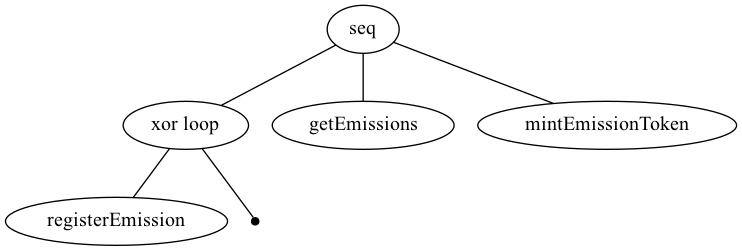

In [5]:
# create the process tree
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}


/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


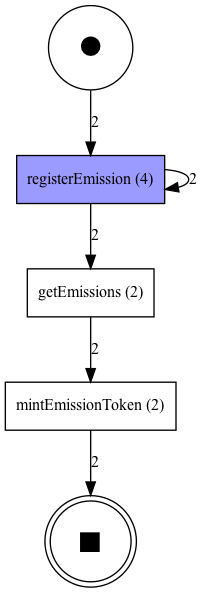

{'registerEmission': (node:registerEmission connections:{registerEmission:[0.6666666666666666], getEmissions:[0.6666666666666666]}), 'getEmissions': (node:getEmissions connections:{mintEmissionToken:[0.6666666666666666]}), 'mintEmissionToken': (node:mintEmissionToken connections:{})}


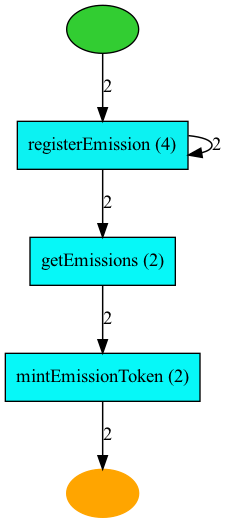

In [6]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

map = pm4py.discover_heuristics_net(log)
print(map)
pm4py.view_heuristics_net(map)

->( *( 'registerEmission', tau ), 'getEmissions', 'mintEmissionToken' )


/var/folders/05/_tsk4bn52_52y3vpwhhmmwk80000gn/T/ipykernel_66882/1507066703.py:1: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive
  process_tree = pm4py.discover_tree_inductive(log)


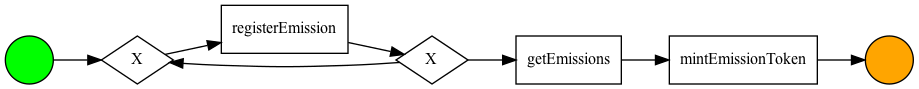

In [7]:
process_tree = pm4py.discover_tree_inductive(log)
print(process_tree)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]
/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


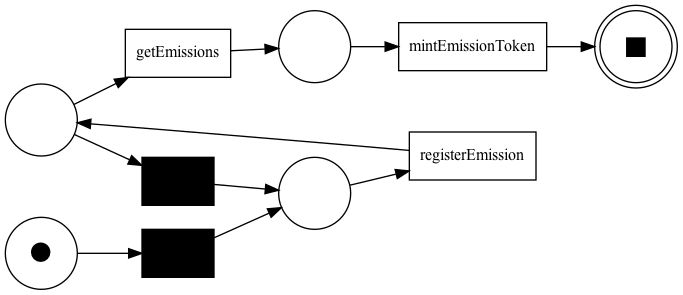

In [8]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)